<a href="https://colab.research.google.com/github/Sunnyk013/Image-Classification-Using-Scikit-learn/blob/main/Image_Classification_Using_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libraries**

We start off this project by importing all the necessary libraries that will be required for the process.

In [2]:
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import numpy as np

**Loading the Image Data**

Loading the image data direct from kaggle platform

In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle

In [5]:
!kaggle datasets download -d sunnyk013/cat500-and-dog500

Dataset URL: https://www.kaggle.com/datasets/sunnyk013/cat500-and-dog500
License(s): CC0-1.0
 70% 21.0M/30.0M [00:00<00:00, 57.6MB/s]
100% 30.0M/30.0M [00:00<00:00, 79.8MB/s]


In [6]:
!unzip cat500-and-dog500.zip

Archive:  cat500-and-dog500.zip
  inflating: Cats_and_Dogs_Dataset/Cat500/0.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/1.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/10.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/100.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/101.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/102.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/103.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/104.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/105.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/106.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/107.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/108.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/109.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/11.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/110.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/111.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/112.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat500/113.jpg  
  inflating: Cats_and_Dogs_Dataset/Cat

In [7]:
input_dir = "/content/Cats_and_Dogs_Dataset"

**Displaying the Image**

To display an image we need a path of each image. Here we are using two functions to handle path .

**os.listdir** - print a list of names of all the files present in the specified path.

**os.path.join** - return a combined path by merging arguments.

In [8]:
categories=["Cat500","Dog500"]
for category in categories:
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path=os.path.join(input_dir,category,file)
    print(img_path)

/content/Cats_and_Dogs_Dataset/Cat500/32.jpg
/content/Cats_and_Dogs_Dataset/Cat500/197.jpg
/content/Cats_and_Dogs_Dataset/Cat500/168.jpg
/content/Cats_and_Dogs_Dataset/Cat500/109.jpg
/content/Cats_and_Dogs_Dataset/Cat500/336.jpg
/content/Cats_and_Dogs_Dataset/Cat500/303.jpg
/content/Cats_and_Dogs_Dataset/Cat500/188.jpg
/content/Cats_and_Dogs_Dataset/Cat500/63.jpg
/content/Cats_and_Dogs_Dataset/Cat500/184.jpg
/content/Cats_and_Dogs_Dataset/Cat500/163.jpg
/content/Cats_and_Dogs_Dataset/Cat500/5.jpg
/content/Cats_and_Dogs_Dataset/Cat500/217.jpg
/content/Cats_and_Dogs_Dataset/Cat500/268.jpg
/content/Cats_and_Dogs_Dataset/Cat500/215.jpg
/content/Cats_and_Dogs_Dataset/Cat500/59.jpg
/content/Cats_and_Dogs_Dataset/Cat500/76.jpg
/content/Cats_and_Dogs_Dataset/Cat500/152.jpg
/content/Cats_and_Dogs_Dataset/Cat500/277.jpg
/content/Cats_and_Dogs_Dataset/Cat500/335.jpg
/content/Cats_and_Dogs_Dataset/Cat500/440.jpg
/content/Cats_and_Dogs_Dataset/Cat500/56.jpg
/content/Cats_and_Dogs_Dataset/Cat500/176

Taking any random path of the previous output to display the image.

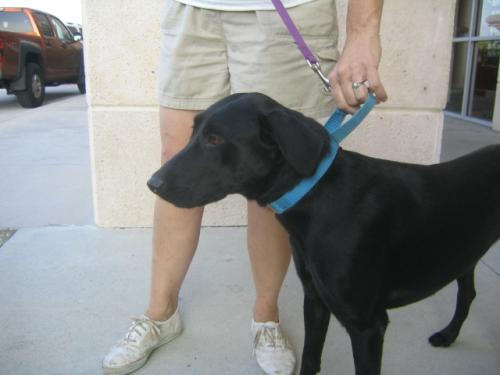

In [9]:
Image.open("/content/Cats_and_Dogs_Dataset/Dog500/72.jpg")

**Image conversion to array**

Converting the image to numpy array

In [10]:
img_path ="/content/Cats_and_Dogs_Dataset/Dog500/72.jpg"

# Converting an image to numpy array
img = imread(img_path)
print(img)

[[[255 255 250]
  [253 255 249]
  [249 255 246]
  ...
  [182 206 232]
  [180 204 230]
  [178 202 228]]

 [[255 253 253]
  [255 254 251]
  [255 255 251]
  ...
  [180 204 228]
  [179 203 227]
  [178 202 226]]

 [[255 249 255]
  [255 249 255]
  [255 250 255]
  ...
  [180 205 227]
  [180 205 227]
  [179 204 226]]

 ...

 [[139 149 158]
  [140 150 159]
  [141 151 160]
  ...
  [101 108 114]
  [100 107 113]
  [ 99 106 112]]

 [[139 149 158]
  [139 149 158]
  [141 151 160]
  ...
  [100 107 113]
  [ 99 106 112]
  [ 98 105 111]]

 [[137 147 156]
  [137 147 156]
  [139 149 158]
  ...
  [ 99 106 112]
  [ 99 106 112]
  [ 98 105 111]]]


Resizing and flattening the numpy array.

In [11]:
img = resize(img,(15,15))
img

array([[[0.72497514, 0.70348898, 0.71143228],
        [0.80102817, 0.78854075, 0.7867418 ],
        [0.90533857, 0.90890916, 0.89815196],
        [0.90827864, 0.90654927, 0.88136582],
        [0.89281863, 0.89484349, 0.87510588],
        [0.79789649, 0.81175898, 0.79301095],
        [0.74271077, 0.75590257, 0.73252657],
        [0.74555783, 0.75267368, 0.74887759],
        [0.70986316, 0.68387751, 0.71117912],
        [0.7022673 , 0.68703862, 0.64224176],
        [0.70724813, 0.62745459, 0.56247716],
        [0.74539717, 0.67031154, 0.60338518],
        [0.76169986, 0.73409564, 0.6925793 ],
        [0.58266795, 0.573593  , 0.54731236],
        [0.5096383 , 0.54971582, 0.57050678]],

       [[0.44367168, 0.39010443, 0.38242062],
        [0.4743586 , 0.43882305, 0.42347013],
        [0.72112298, 0.72073453, 0.71362376],
        [0.90238226, 0.89713048, 0.87202326],
        [0.88875673, 0.88506488, 0.85900969],
        [0.78465056, 0.79060856, 0.76268815],
        [0.72736343, 0.72832541,

In [12]:
img = img.flatten()

Converting all the images into a
1-D array and storing it into data
variable. Here Label contains
two categories i.e 0 (Cat) and
1 (Dog)

In [13]:
# Creating two empty list as data and labels
data = []
labels = []

for category_idx, category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path = os.path.join(input_dir,category,file)
    img = imread(img_path)  # img is a numpy array
    img = resize(img,(15,15))
    data.append(img.flatten())
    labels.append(category_idx)

labels = np.asarray(labels)
data = np.asarray(data)

**Logistic Regression**

Accuracy obtained by logistic regression is 48 percent.

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,
                                                 shuffle=True, stratify=labels)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.545

**Decision Tree**

Accuracy obtained by decision tree model is 54 percent.

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.545

**Random Forest**

Accuracy obtained by random forest model is 70 percent.

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.635

**Hyperparameter Tuning - Random Forest**

Accuracy obtained by random forest model is 63 percent.

In [37]:
rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators':[200,500],
    'max_features':['sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}

from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(x_train,y_train)

CV_rfc.best_params_
rfc1 = RandomForestClassifier(random_state=42, max_features='sqrt',
                              n_estimators=200, max_depth=8, criterion='gini')

rfc1.fit(x_train,y_train)
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest on data: ", accuracy_score(y_test,y_pred))

Accuracy for Random Forest on data:  0.635


Creating the dataframe for actual and predicted value.

In [40]:
import pandas as pd
pd.DataFrame({"Actual_value":y_test,"Predicted_Value":y_pred})

,Actual_value,Predicted_Value
0,1,1
1,0,0
2,0,0
3,1,0
4,0,1
...,...,...
195,0,0
196,1,1
197,0,0
198,1,1


**Note** - We have trained 1000 images of
cats and dogs. Increase in sample image
will lead to increase in accuracy.